In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('QueryResults.csv', names=['date', 'lang', 'amount'], header=0)

In [36]:
df

date        lang  amount
0     2008-07-01 00:00:00          c#       3
1     2008-08-01 00:00:00    assembly       8
2     2008-08-01 00:00:00  javascript     162
3     2008-08-01 00:00:00           c      85
4     2008-08-01 00:00:00      python     124
...                   ...         ...     ...
1986  2020-07-01 00:00:00           r    5694
1987  2020-07-01 00:00:00          go     743
1988  2020-07-01 00:00:00        ruby     775
1989  2020-07-01 00:00:00        perl     182
1990  2020-07-01 00:00:00       swift    3607

[1991 rows x 3 columns]

In [37]:
df.groupby('lang').sum(numeric_only=True)

amount
lang               
assembly      34852
c            336042
c#          1423530
c++          684210
delphi        46212
go            47499
java        1696403
javascript  2056510
perl          65286
php         1361988
python      1496210
r            356799
ruby         214582
swift        273055

In [40]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [41]:
df['date']

0       2008-07-01
1       2008-08-01
2       2008-08-01
3       2008-08-01
4       2008-08-01
           ...    
1986    2020-07-01
1987    2020-07-01
1988    2020-07-01
1989    2020-07-01
1990    2020-07-01
Name: date, Length: 1991, dtype: object

In [59]:
df_piv = df.pivot_table(columns='lang', index='date', values='amount')
df_piv.fillna(0, inplace=True)
df_piv

lang        assembly       c       c#     c++  delphi     go     java  \
date                                                                    
2008-07-01       0.0     0.0      3.0     0.0     0.0    0.0      0.0   
2008-08-01       8.0    85.0    511.0   164.0    14.0    0.0    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    0.0   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    0.0   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    0.0    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

lang        javascript   perl     php   python       r   ruby   swift  
date                                                                   
2008-07-01         0.0    0.0     0.0      0.0     0.0    0.0     0.0  
2008-08-01       162.0   28.0   161.0    124.0     0.0   73.0     0.0  
2008-09-01       640.0  131.0   482.0    542.0     6.0  290.0     0.0  
2008-10-01       725.0  127.0   617.0    510.0     0.0  249.0     0.0  
2008-11-01       579.0   97.0   504.0    452.0     1.0  160.0     0.0  
...                ...    ...     ...      ...     ...    ...     ...  
2020-03-01     20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01     24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01     25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01     23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01     23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0  

[145 rows x 14 columns]

In [60]:
df_piv.isna().values.any()
df_piv.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='lang')

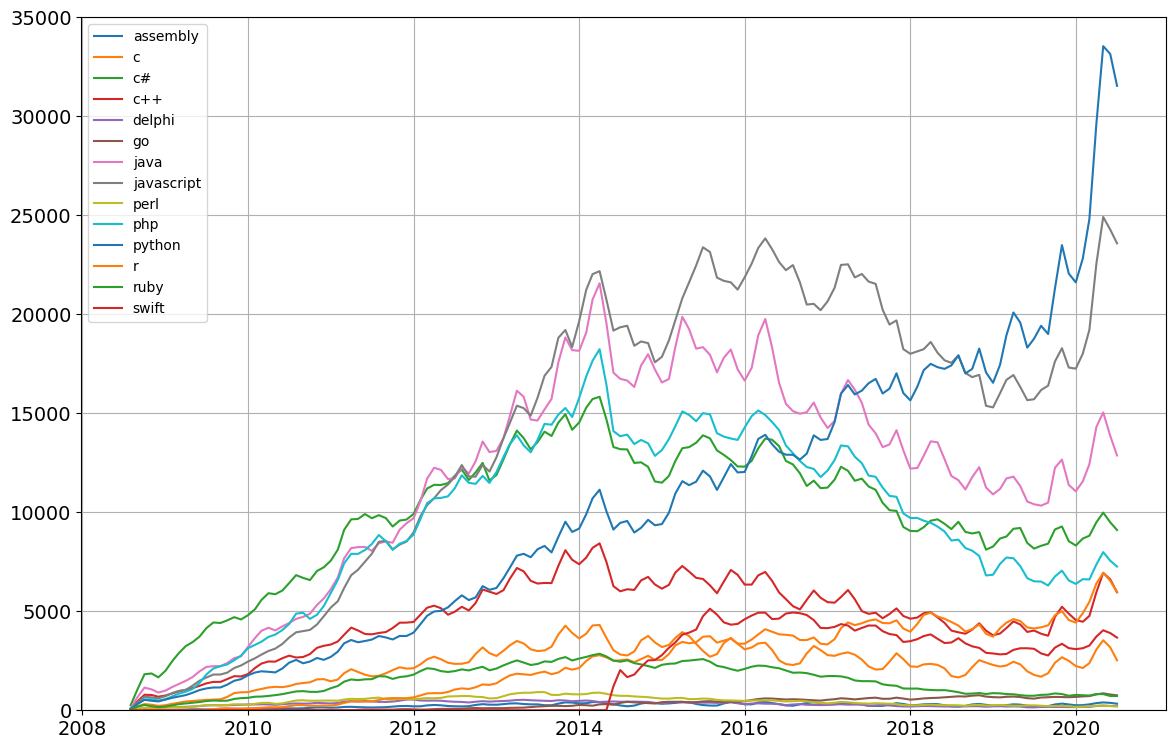

In [91]:
plt.figure(figsize=(14,9))
for column_name in df_piv.columns:
    plt.plot(df_piv.index, df_piv[column_name].rolling(window=2).mean(), label=column_name)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.grid()
plt.show()